## import libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

## get asset data for past 7 years

In [2]:
today = datetime.now()
begin = (today - timedelta(days=7*365)).strftime('%Y-%m-%d') #
stocks_list = ['HD', 'MSFT', 'NVDA', 'TSLA', 'UNH']# stocks: home depot, microsoft, nvidia, tesla, unitedhealth group
commodities_list = ['CL=F', 'GC=F', 'HG=F', 'NG=F', 'ZC=F']# commodities: crude oil, gold, copper, natural gas, corn
stocks = yf.download(stocks_list, start=begin)['Adj Close']
comms = yf.download(commodities_list, start=begin)['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [3]:
stocks

,HD,MSFT,NVDA,TSLA,UNH
Date,,,,,
2016-06-30,108.198357,46.311310,11.547010,14.152000,127.200874
2016-07-01,109.833755,46.302258,11.461041,14.433333,126.894554
2016-07-05,109.604965,46.311310,11.630522,14.265333,127.525154
2016-07-06,111.486099,46.501373,11.704210,14.296000,128.263885
2016-07-07,111.138672,46.501373,12.008791,14.396000,126.840515
...,...,...,...,...,...
2023-06-23,300.809998,335.019989,422.089996,256.600006,477.000000
2023-06-26,307.890015,328.600006,406.320007,241.050003,479.059998
2023-06-27,313.739990,334.570007,418.760010,250.210007,482.559998


In [4]:
comms

,CL=F,GC=F,HG=F,NG=F,ZC=F
Date,,,,,
2016-06-30,48.330002,1318.400024,2.1945,2.924,358.75
2016-07-01,48.990002,1336.699951,2.2150,2.987,353.00
2016-07-05,46.599998,1356.400024,2.1815,2.764,344.00
2016-07-06,47.430000,1364.900024,2.1515,2.786,335.75
2016-07-07,45.139999,1360.099976,2.1225,2.777,335.50
...,...,...,...,...,...
2023-06-23,69.160004,1919.099976,3.8060,2.729,630.75
2023-06-26,69.370003,1923.699951,3.7865,2.791,637.25
2023-06-27,67.699997,1914.000000,3.7815,2.763,623.00


## normalize then plot data

Text(0, 0.5, 'Normalized Stock Prices (%)')

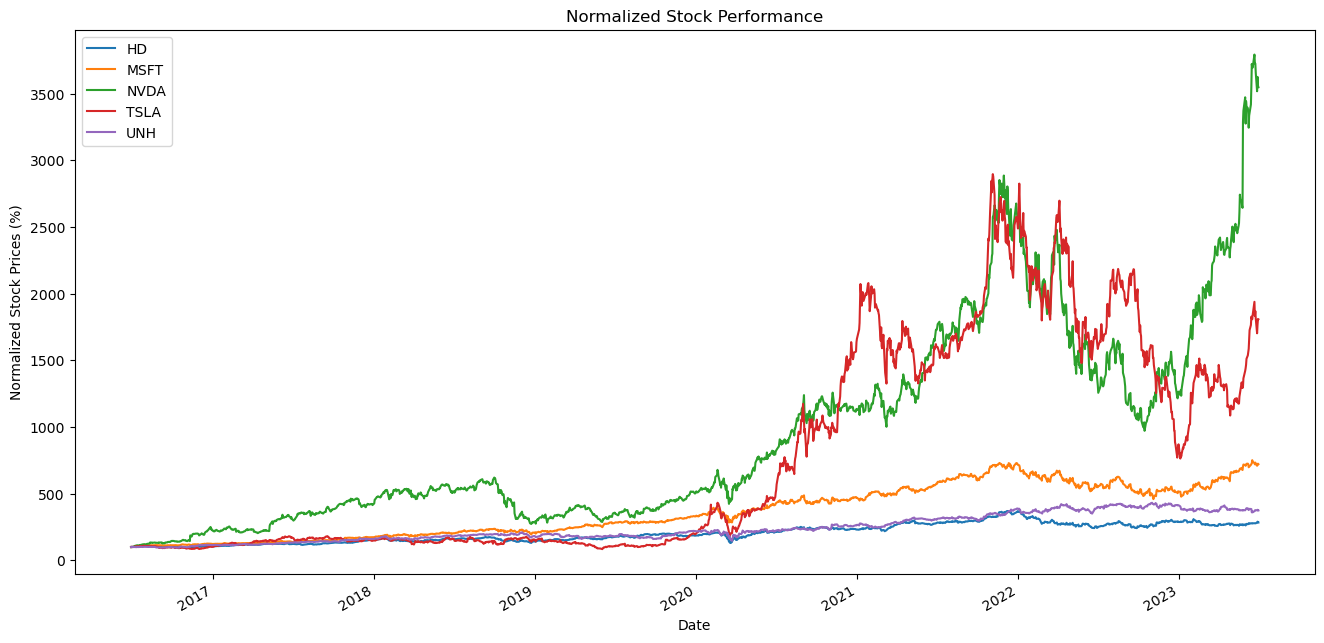

In [5]:
norm_stocks = ((stocks / stocks.iloc[0]) * 100)
norm_stocks.plot(figsize=(16,8))
plt.title('Normalized Stock Performance')
plt.ylabel('Normalized Stock Prices (%)')

Text(0, 0.5, 'Normalized Commodities Prices (%)')

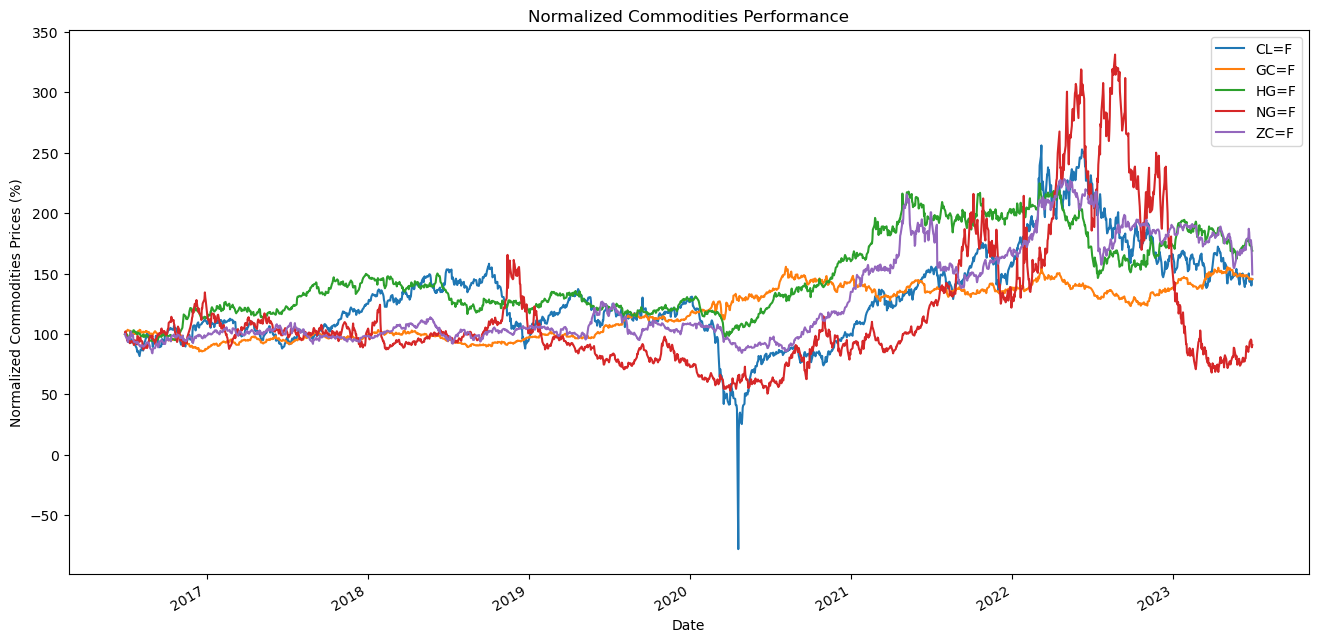

In [6]:
norm_comms = ((comms / comms.iloc[0]) * 100)
norm_comms.plot(figsize=(16,8))
plt.title('Normalized Commodities Performance')
plt.ylabel('Normalized Commodities Prices (%)')

## calculate annual returns and risk

In [7]:
stocks_daily_ret = stocks.pct_change().dropna()
stocks_daily_summary = stocks_daily_ret.describe().T.loc[:,['mean', 'std']]
stocks_annual_summary = stocks_daily_summary.copy()
stocks_annual_summary['mean'] = stocks_annual_summary['mean']*252
stocks_annual_summary['std'] = stocks_annual_summary['std']*np.sqrt(252)
stocks_annual_summary

,mean,std
HD,0.183591,0.259873
MSFT,0.322907,0.282344
NVDA,0.640758,0.510927
TSLA,0.592319,0.596576
UNH,0.225427,0.269526


In [8]:
comms_daily_ret = comms.pct_change().dropna()
comms_daily_summary = comms_daily_ret.describe().T.loc[:,['mean', 'std']]
comms_annual_summary = comms_daily_summary.copy()
comms_annual_summary['mean'] = comms_annual_summary['mean']*252
comms_annual_summary['std'] = comms_annual_summary['std']*np.sqrt(252)
comms_annual_summary

,mean,std
CL=F,-0.361532,1.344886
GC=F,0.064011,0.144814
HG=F,0.099689,0.222390
NG=F,0.186439,0.636628
ZC=F,0.091443,0.259325


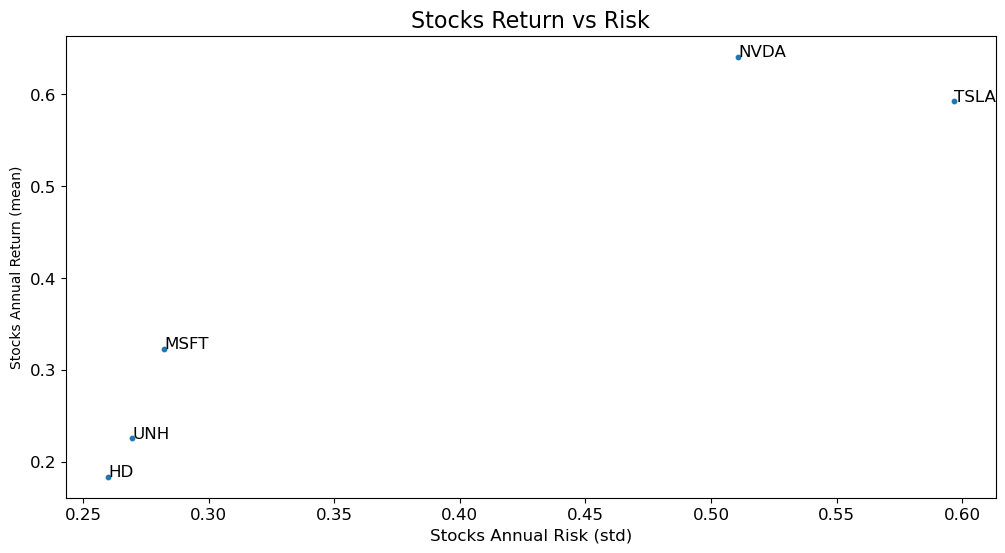

In [9]:
stocks_annual_summary.plot.scatter(x='std', y='mean', figsize=(12,6), s=10, fontsize=12)
for i in stocks_annual_summary.index:
    plt.annotate(i, xy=(stocks_annual_summary.loc[i, 'std'], stocks_annual_summary.loc[i, 'mean']), size=12)
plt.xlabel('Stocks Annual Risk (std)', fontsize=12)
plt.ylabel('Stocks Annual Return (mean)')
plt.title('Stocks Return vs Risk', fontsize=16)
plt.show()

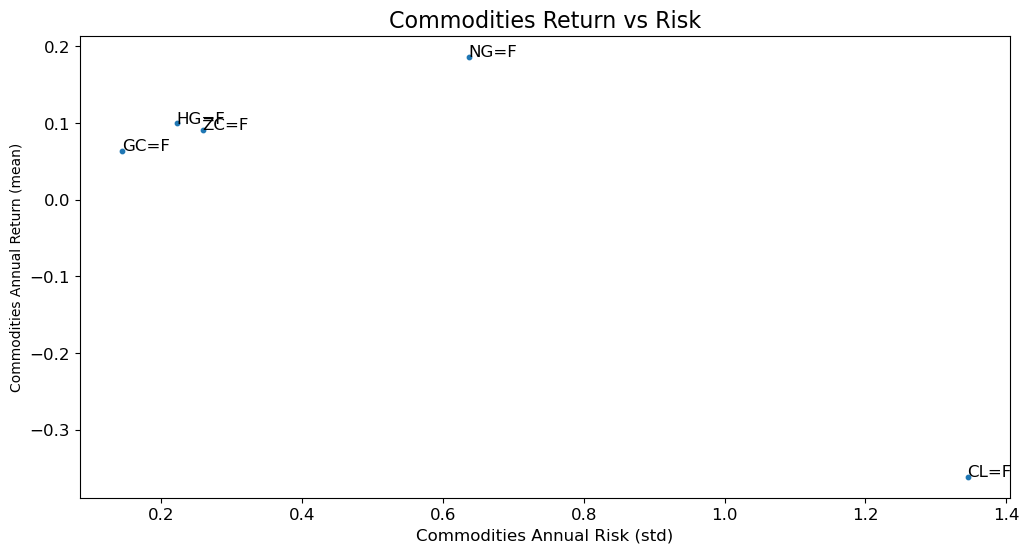

In [10]:
comms_annual_summary.plot.scatter(x='std', y='mean', figsize=(12,6), s=10, fontsize=12)
for i in comms_annual_summary.index:
    plt.annotate(i, xy=(comms_annual_summary.loc[i, 'std'], comms_annual_summary.loc[i, 'mean']), size=12)
plt.xlabel('Commodities Annual Risk (std)', fontsize=12)
plt.ylabel('Commodities Annual Return (mean)')
plt.title('Commodities Return vs Risk', fontsize=16)
plt.show()

## correlation and covariance

In [11]:
stocks_cov = stocks_daily_ret.cov()
stocks_corr = stocks_daily_ret.corr()

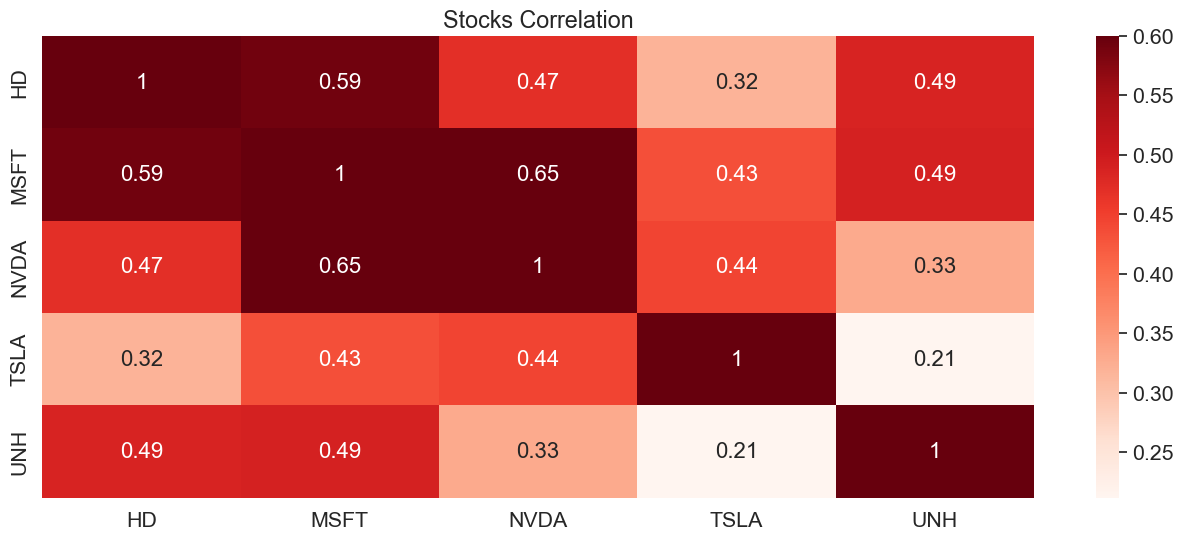

In [12]:
# plot heatmap of stocks correlation
plt.figure(figsize=(16,6))
sns.set(font_scale=1.4)
sns.heatmap(stocks_corr,cmap='Reds',annot=True,annot_kws={'size':16},vmax=0.6)
plt.title('Stocks Correlation')
plt.show()

In [13]:
comms_cov = comms_daily_ret.cov()
comms_corr = comms_daily_ret.corr()

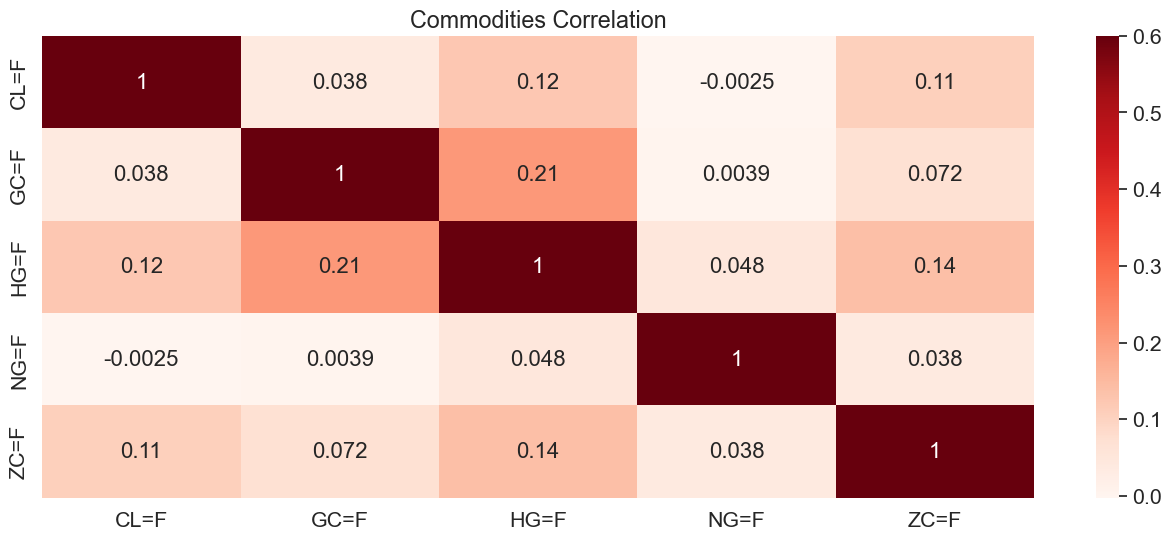

In [14]:
# plot heatmap of commodities correlation
plt.figure(figsize=(16,6))
sns.set(font_scale=1.4)
sns.heatmap(comms_corr,cmap='Reds',annot=True,annot_kws={'size':16},vmax=0.6)
plt.title('Commodities Correlation')
plt.show()

## forecast prices

In [15]:
# get data for natural gas
nat_gas = comms['NG=F']
nat_gas

Date
2016-06-30    2.924
2016-07-01    2.987
2016-07-05    2.764
2016-07-06    2.786
2016-07-07    2.777
              ...  
2023-06-23    2.729
2023-06-26    2.791
2023-06-27    2.763
2023-06-28    2.603
2023-06-29    2.657
Name: NG=F, Length: 1762, dtype: float64

Text(0, 0.5, 'Price ($/mmBtu)')

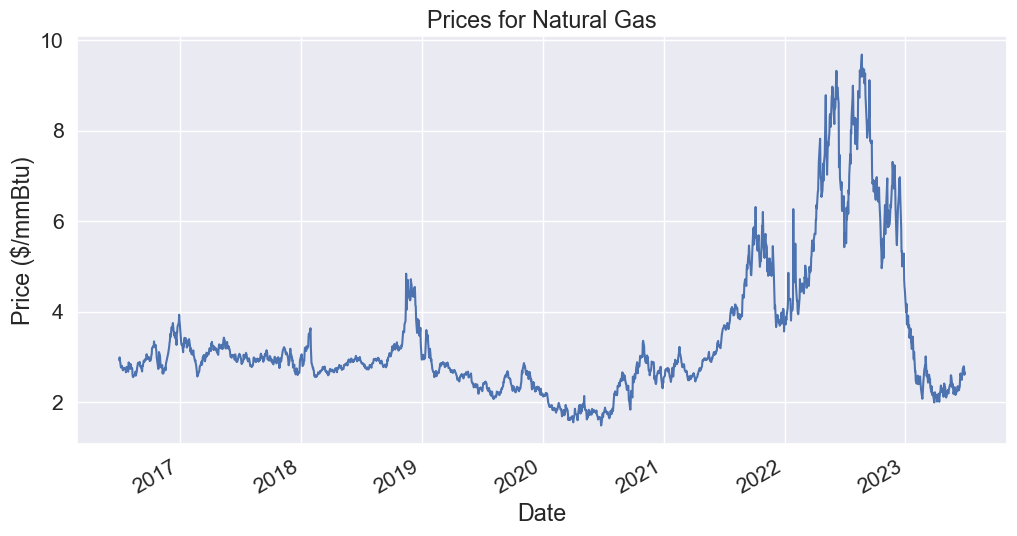

In [16]:
# get returns for natural gas
nat_gas_returns = np.log(1 + nat_gas.pct_change())
nat_gas.plot(figsize=(12,6))
plt.title('Prices for Natural Gas')
plt.ylabel('Price ($/mmBtu)')

Text(0, 0.5, 'Daily Returns ($)')

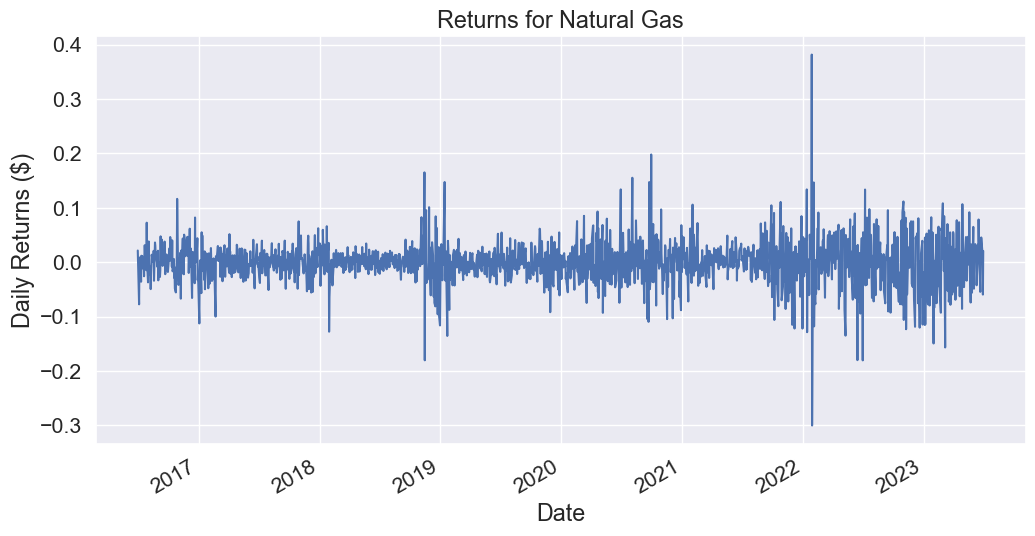

In [17]:
nat_gas_returns.plot(figsize=(12,6))
plt.title('Returns for Natural Gas')
plt.ylabel('Daily Returns ($)')

In [18]:
# get mean, variance, and standard deviation
u = nat_gas_returns.mean()
var = nat_gas_returns.var()
std = [nat_gas_returns.std()]
print(u, var, std)

-5.4375274947581806e-05 0.0015847870121079837 [0.039809383468071745]


In [19]:
# calculate drift = u - 1/2(var)
drift = [u - (0.5 * var)]
std, drift

([0.039809383468071745], [-0.0008467687810015737])

In [20]:
# forecast nat_gas prices for every trading day for the next year 
# get 10 possible outcomes/iterations
days = 252
iterations = 10

In [21]:
# calculate daily returns = exp(drift + std * z)
# z = 𝑛𝑜𝑟𝑚.𝑝𝑝𝑓(𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑(𝑡_𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙𝑠,𝑖𝑡𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠)
daily_returns = np.exp(drift + std * norm.ppf(np.random.rand(days, iterations)))
daily_returns

array([[1.039769  , 1.03799675, 1.01462519, ..., 1.04957825, 0.9783214 ,
        1.08106349],
       [1.02183377, 1.01731895, 1.06789431, ..., 0.98721257, 0.96929975,
        1.07269166],
       [0.99094616, 0.92675527, 1.02092124, ..., 0.97189233, 0.95817447,
        0.98905175],
       ...,
       [0.94898306, 0.96549377, 1.04935812, ..., 1.00002456, 0.95670419,
        0.98831947],
       [1.0712863 , 0.96511522, 0.90945227, ..., 1.01962709, 0.99724881,
        0.99986401],
       [0.84317761, 1.05234786, 1.0185159 , ..., 1.00237169, 1.07283892,
        1.001354  ]])

In [22]:
# get last closing price of nat_gas
last_close = nat_gas.iloc[-1]
last_close

2.6570000648498535

In [23]:
# create matrix, price_list, with same dimensions as daily_returns
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0] = last_close

In [25]:
# loop to reassign to the price in time t the product of the price in day t-1
for day in range(1, days):
    price_list[day] = price_list[day - 1] * daily_returns[day]

price_list

array([[2.65700006, 2.65700006, 2.65700006, ..., 2.65700006, 2.65700006,
        2.65700006],
       [2.7150124 , 2.70301653, 2.83739525, ..., 2.62302385, 2.57542949,
        2.8501418 ],
       [2.69043112, 2.50503481, 2.89675708, ..., 2.54929675, 2.46771079,
        2.81893772],
       ...,
       [3.03450607, 5.44789214, 4.13594905, ..., 5.92446921, 1.92511324,
        3.79469178],
       [3.25082477, 5.25784362, 3.76144823, ..., 6.04074928, 1.91981689,
        3.79417575],
       [2.74102266, 5.53308047, 3.83109484, ..., 6.05507606, 2.05965427,
        3.79931305]])

Text(0.5, 0, 'Day')

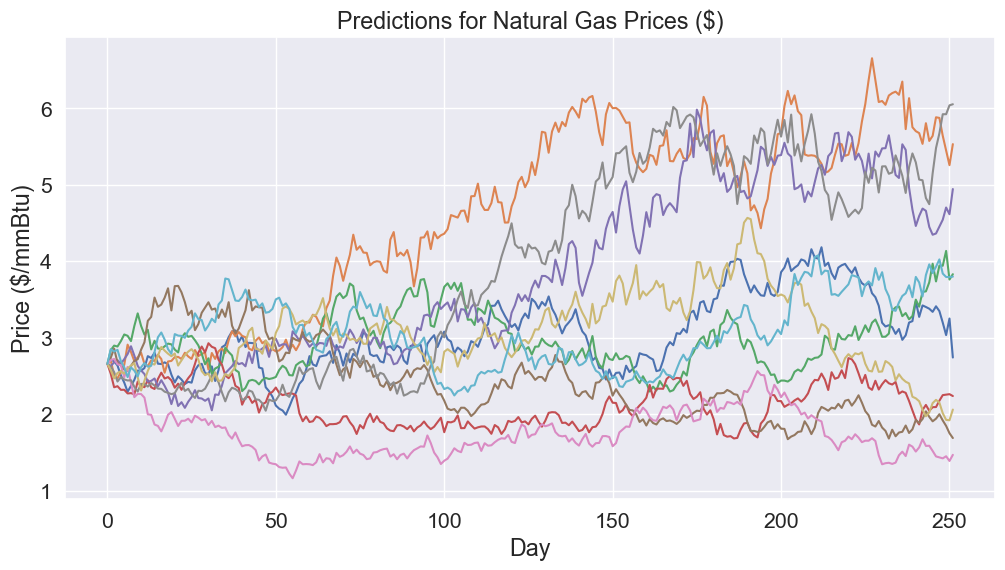

In [26]:
# plot obtained price list data
plt.figure(figsize=(12,6))
plt.plot(price_list)
plt.title('Predictions for Natural Gas Prices ($)')
plt.ylabel('Price ($/mmBtu)')
plt.xlabel('Day')
